<h1><center>Predict CTR of an Email Campaign</center></h1>

<h3>Problem Statement</h3>

Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered


CTR depends on multiple factors like design, content, personalization, etc. 


* How do you design the email content effectively?
* What should your subject line look like?
* What should be the length of the email?
* Do you need images in your email template?

<h3>Objective</h3>

Task is to build a machine learning-based approach to predict the CTR of an email campaign.

<h3>About the Dataset</h3>

You are provided with the information of past email campaigns containing the email attributes like subject and body length, no. of CTA, date and time of an email, type of the audience, whether its a personalized email or not, etc and the target variable indicating the CTR of the email campaign.

<h3>Data Definition</h3>

Variable||Description

campaign_id ||Unique identifier of a campaign

sender ||Sender of an e-mail

subject_len ||No. of characters in a subject

body_len ||No. of characters in an email body

mean_paragraph_len ||Average no. of characters in paragraph of an email

day_of_week ||Day on which email is sent

is_weekend ||Boolean flag indicating if an email is sent on weekend or not

times_of_day  ||Times of day when email is sent: Morning, Noon, Evening

category ||Category of the product an email is related to

product  ||Type of the product an email is related to

no_of_CTA ||No. of Call To Actions in an email

mean_CTA_len  ||Average no. of characters in a CTA 

is_image ||Boolean flag indicating if an email contains an image or not

is_personalised ||Boolean flag indicating if an email is personalized to the user or not

is_quote ||Boolean flag indicating if an email contains a quote or not

is_timer ||Boolean flag indicating if an email contains a timer or not

is_emoticons ||Boolean flag indicating if an email contains emoticons or not

is_discount ||Boolean flag indicating if an email contains a discount or not

is_price ||Boolean flag indicating if an email contains price or not

is_urgency ||Boolean flag indicating if an email contains urgency or not

target_audience ||Cluster label of the target audience

click_rate (Target Variable) ||Click rate of an email campaign



In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Data
train=pd.read_csv('train_F3fUq2S.csv')
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [3]:
train.shape

(1888, 22)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [5]:
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [6]:
#checking if Campaingn_id has no Duplicate Value
if((train.campaign_id.nunique()==len(train))==True):
    train.drop('campaign_id',axis=1,inplace=True)
train.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,3,76,10439,39,5,1,Noon,6,26,3,...,0,0,0,0,0,0,0,0,14,0.103079
1,3,54,2570,256,5,1,Morning,2,11,0,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,5,1,Noon,2,11,3,...,1,0,1,0,0,0,0,0,16,0.002769
3,3,74,11037,30,4,0,Evening,15,9,4,...,0,0,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,5,1,Noon,6,26,3,...,0,0,1,0,0,0,0,0,14,0.142826


In [7]:
# Unique Values in Each Column
train.nunique()

sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

<h4>As is_timer Column is the same throught out data do Dropping that Column</h4>

In [8]:
train.drop('is_timer',axis=1,inplace=True)

In [9]:
# Distribution of Each Variable
train.describe()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,30.233051,0.909958,0.056674,0.834216,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,11.848663,0.866467,0.231279,1.033901,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,35.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,162.000000,6.000000,1.000000,6.000000,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [10]:
# Seperating Numerical and Categorical Columns
categorical=['sender','day_of_week', 'is_weekend','times_of_day','category', 'product','is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency']
numerical=[ 'subject_len', 'body_len', 'mean_paragraph_len','no_of_CTA', 'mean_CTA_len','target_audience']

In [11]:
## Getting the correlation of all the features with target variable. 
(train.corr()*100)["click_rate"].sort_values(ascending = False)[1:]

mean_paragraph_len    17.804219
product               12.160228
is_weekend            11.413841
day_of_week            8.637233
target_audience        3.871267
is_personalised        3.292178
is_image              -2.152701
is_price              -3.053971
mean_CTA_len          -3.116197
sender                -3.139755
is_discount           -8.610470
is_emoticons          -9.430523
is_quote              -9.840186
is_urgency           -11.428382
category             -16.775621
no_of_CTA            -17.263684
subject_len          -18.014338
body_len             -24.786556
Name: click_rate, dtype: float64

# Univarient Analysis

In [12]:
def UVA_numerical(data,numerical):
    from scipy.stats import kurtosis
    # looping numerical list
    for i in numerical:
        min_=min(data[i])
        max_=max(data[i])
        std_=np.std(data[i])
        kurtosis_=kurtosis(data[i])
        
        # plot
        plt.figure(figsize=(10,5))
        sns.kdeplot(data[i],fill=True)
        plt.xlabel(i)
        plt.ylabel("Percentage of Distribution")
        plt.title('Range(Max:{0}Max:{1}),Std deviation:{2},Kurtosis:{3}'.format(min_,max_,std_,kurtosis_))

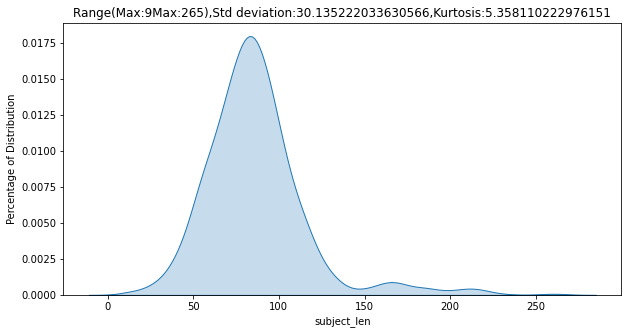

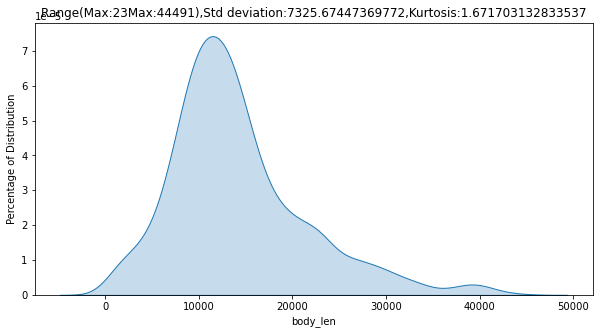

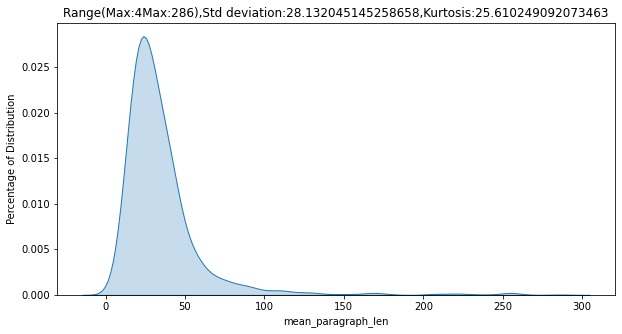

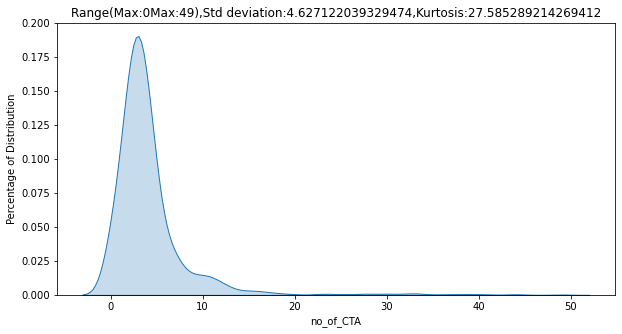

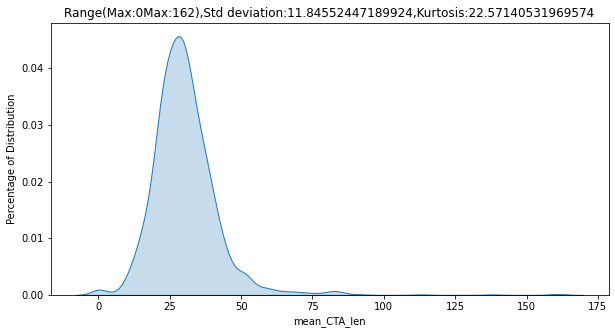

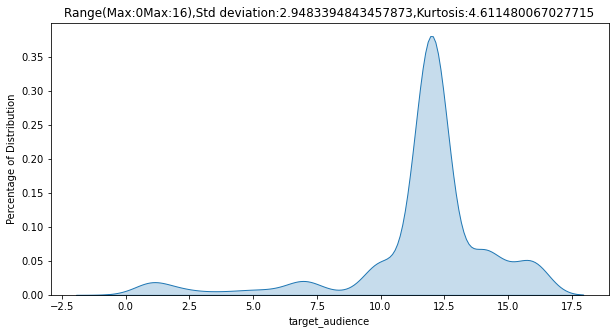

In [13]:
for i in numerical:
    UVA_numerical(train,[i])

### Note:
* Max of the Numerical Variables are righed Skewed
* Execpt Target Audience which is Right Skewed
* Max of Click_rate is 'ZERO'

In [14]:
def UVA_Categorical(data,categorical):
    from scipy.stats import kurtosis
    # looping numerical list
    for i in categorical:
        min_=min(data[i])
        max_=max(data[i])
        
        # plot
        plt.figure(figsize=(10,5))
        plt.bar(data[i].unique(),data[i].value_counts()/len(data[i])*100)
        plt.xlabel(i)
        plt.ylabel("Percentage")
        plt.title('Range(Max:{0}Max:{1})'.format(min_,max_))

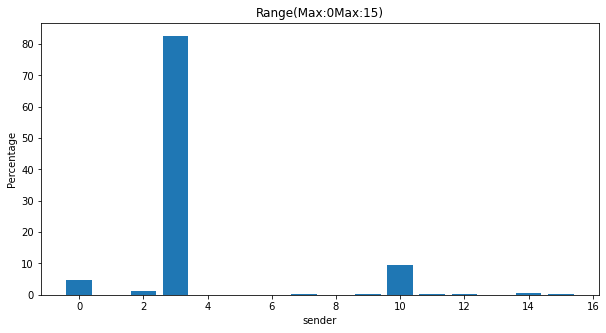

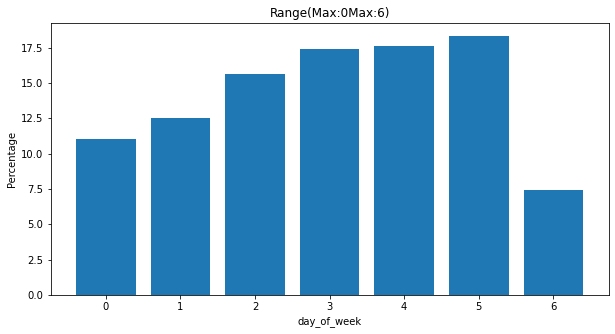

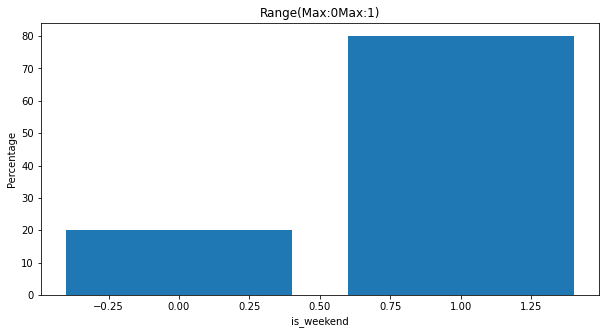

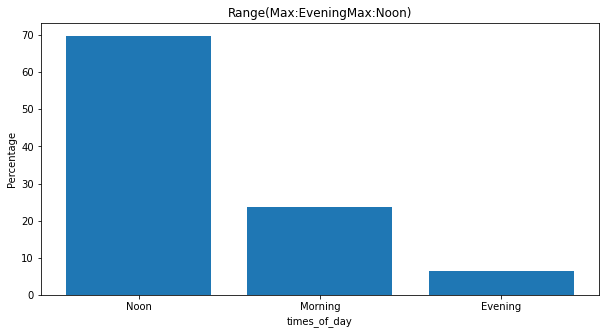

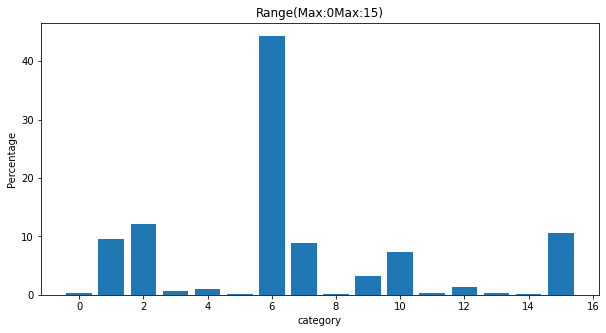

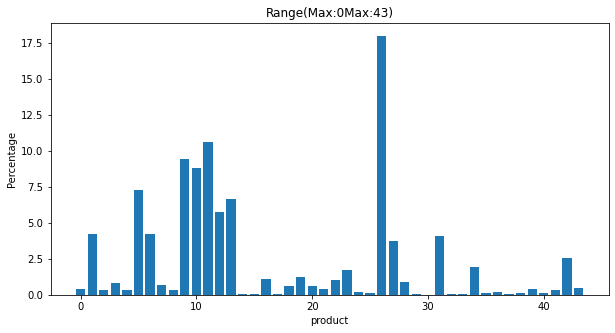

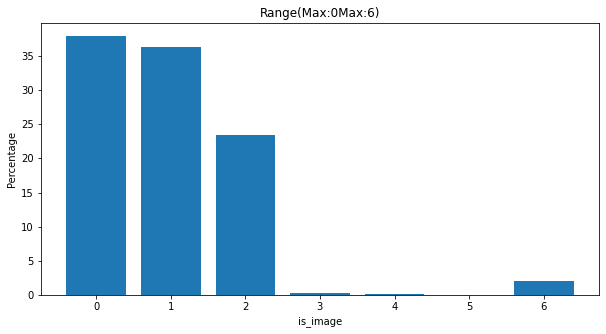

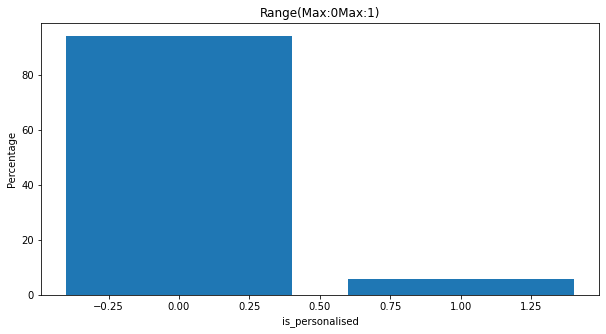

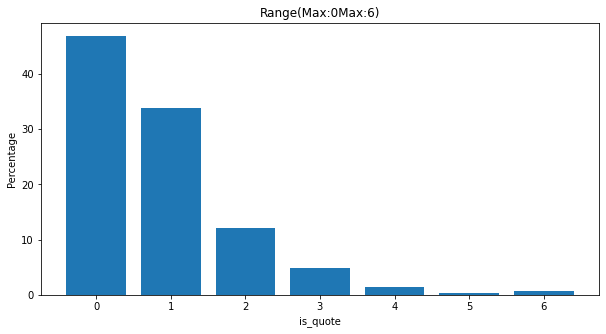

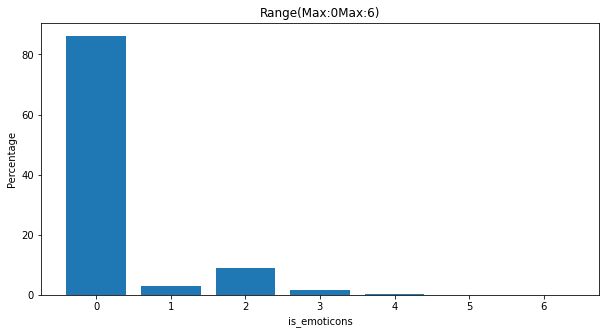

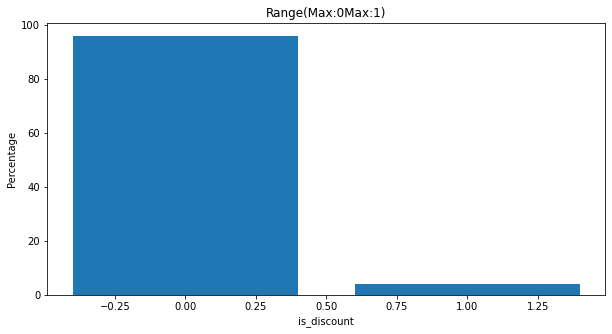

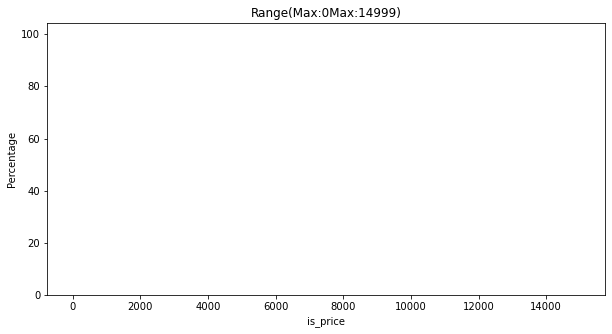

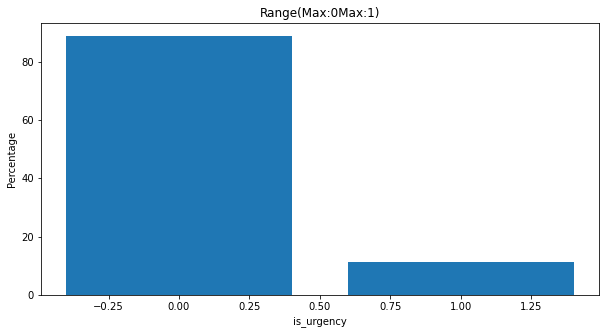

In [15]:
UVA_Categorical(train,categorical)

## Note
- Sender-3 cover arount 80% of the Data
- day_of_week- day5(sartarday) is the Max entry and the Lowest entry would be Day6 (sunday)
- is_weekend has 80% of class1
- times_of_day noon covers around 70% of the data
- Category6 is Contributing more than 45%
- is image class 0 is Max
- is personalised 0 class is around 85%
- is_quota is Redusing as the increase in value of is_quote
- is_emoticons class 0 is around 85%
- is_discount class 0 is around 95%
- is_urgency class 0 is around 90%

# Bivarient Analysis

In [16]:
## Numerical Numerical
numerical_col=numerical
numerical_col.append('click_rate')
train[numerical_col].corr()

,subject_len,body_len,mean_paragraph_len,no_of_CTA,mean_CTA_len,target_audience,click_rate
subject_len,1.000000,0.427326,-0.224770,0.400213,0.144261,-0.021855,-0.180143
body_len,0.427326,1.000000,-0.496146,0.559353,0.083468,-0.075754,-0.247866
mean_paragraph_len,-0.224770,-0.496146,1.000000,-0.170012,0.064632,-0.110896,0.178042
no_of_CTA,0.400213,0.559353,-0.170012,1.000000,0.170387,-0.007979,-0.172637
mean_CTA_len,0.144261,0.083468,0.064632,0.170387,1.000000,0.007170,-0.031162
target_audience,-0.021855,-0.075754,-0.110896,-0.007979,0.007170,1.000000,0.038713
click_rate,-0.180143,-0.247866,0.178042,-0.172637,-0.031162,0.038713,1.000000


<AxesSubplot:>

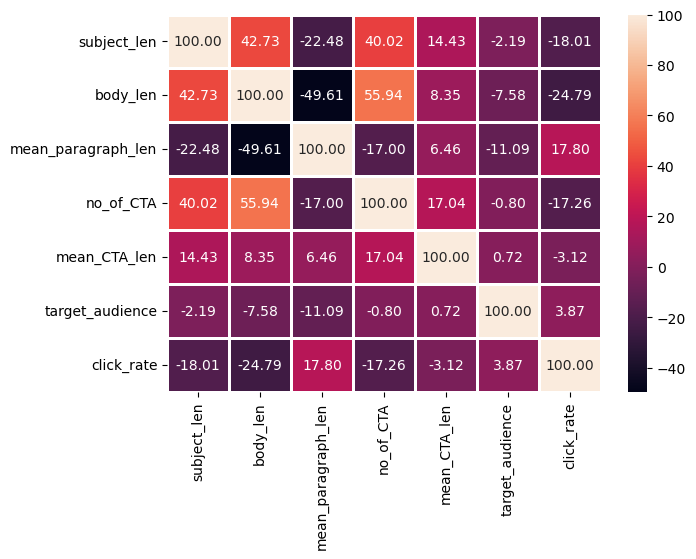

In [17]:
# Heat map
plt.figure(figsize=(7,5),dpi=100)
sns.heatmap(train[numerical_col].corr()*100,linewidths=1,annot=True,fmt='0.2f')

### Note
Correlation Greater than 45%
* body_len - no_of_CTA is 55.94% correlated
* body_len - mean_paragraph_len is 49.61% correlated

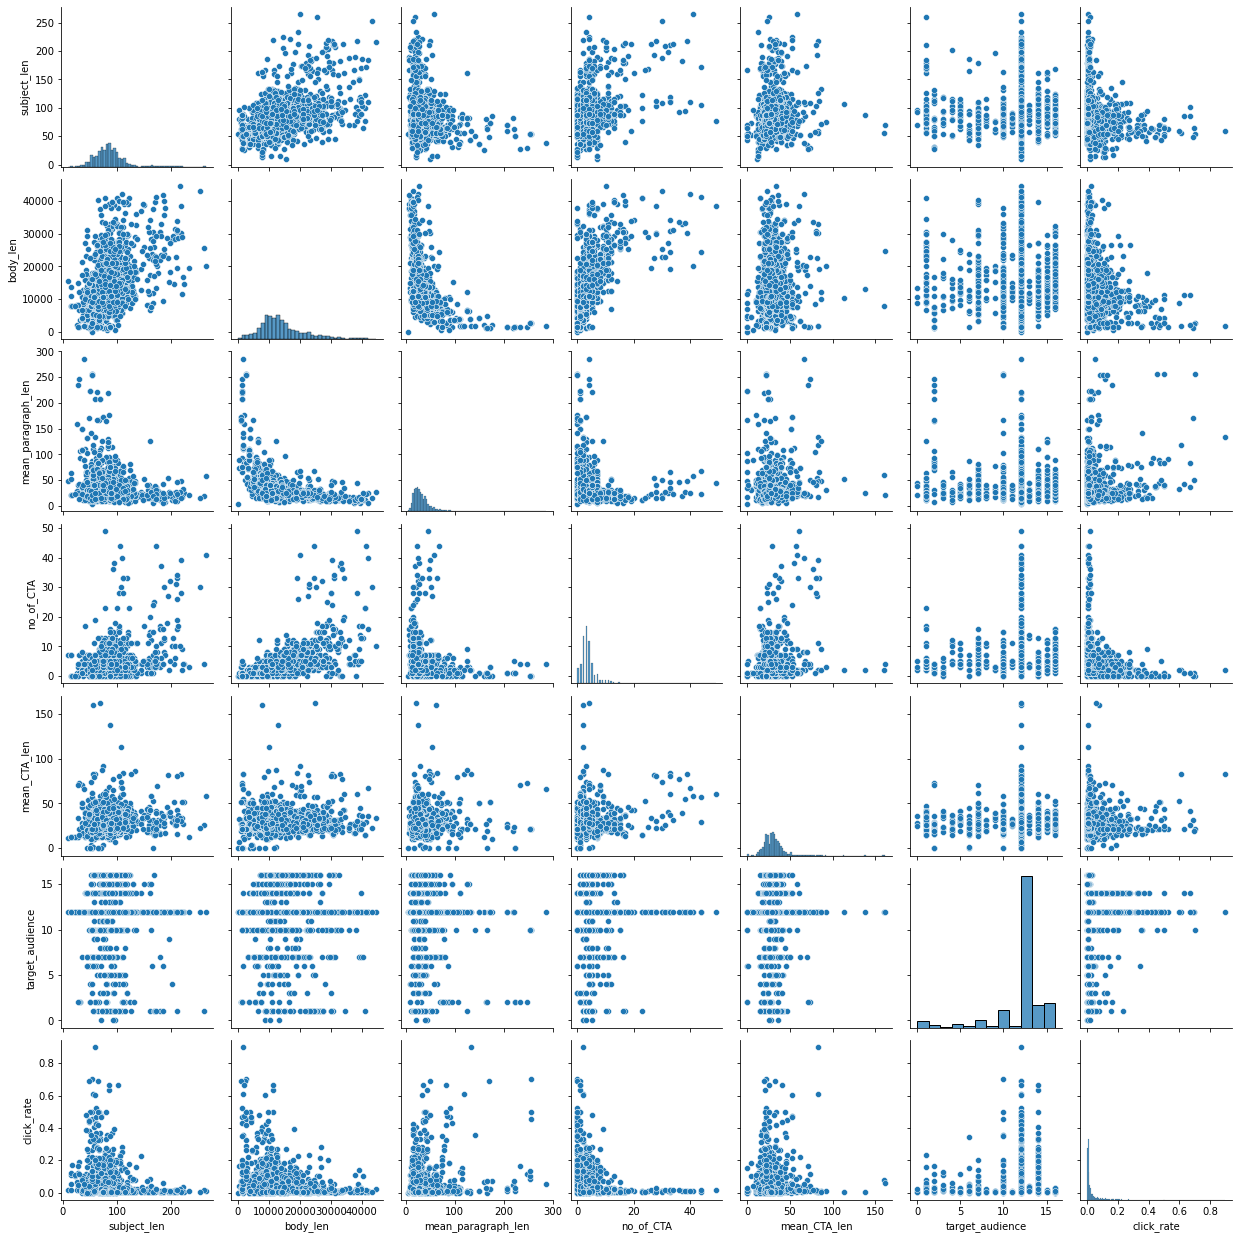

In [18]:
sns.pairplot(train[numerical_col])

#### Note
Distribution of Numerical with Eatch other

## Categorical - Numerical

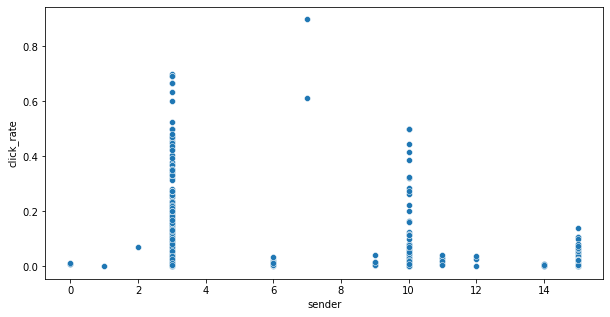

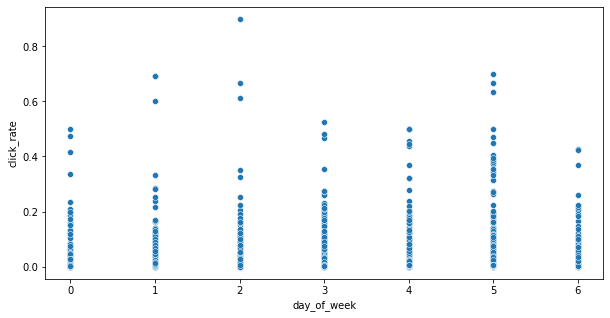

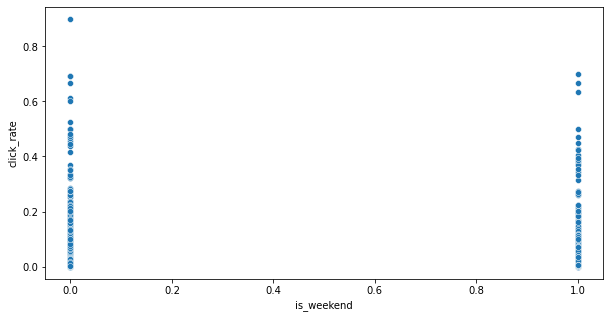

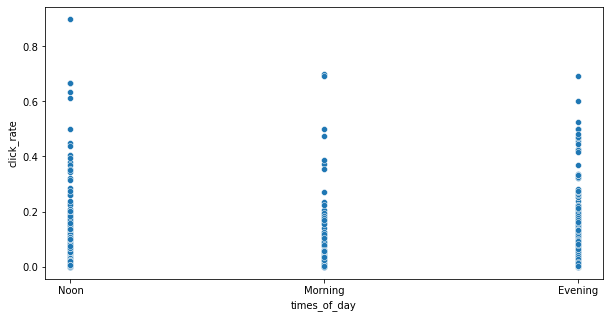

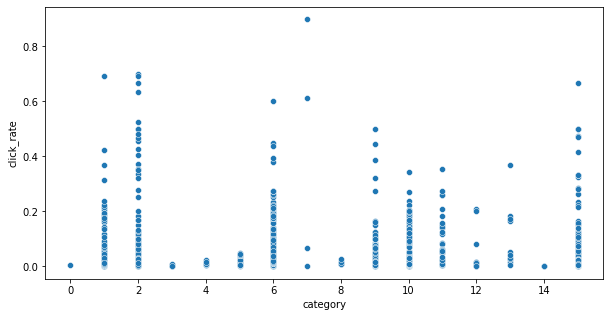

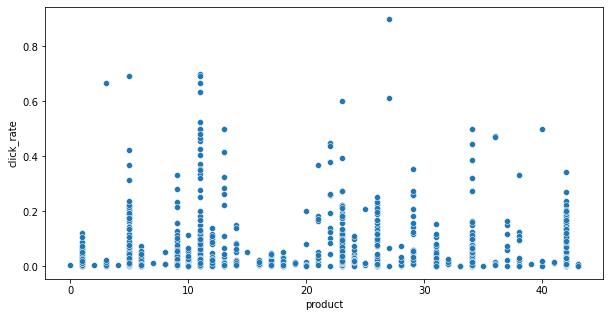

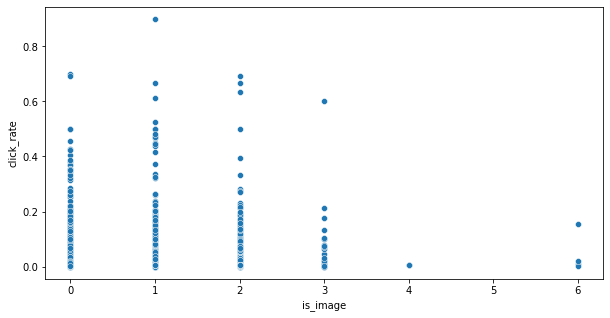

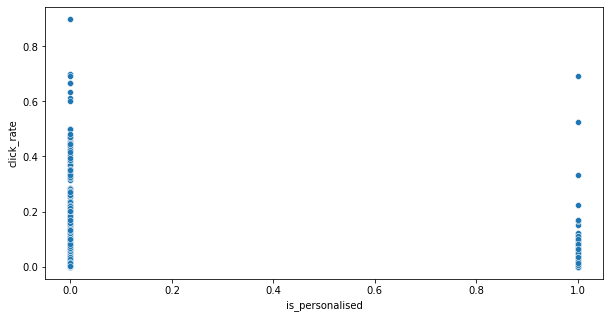

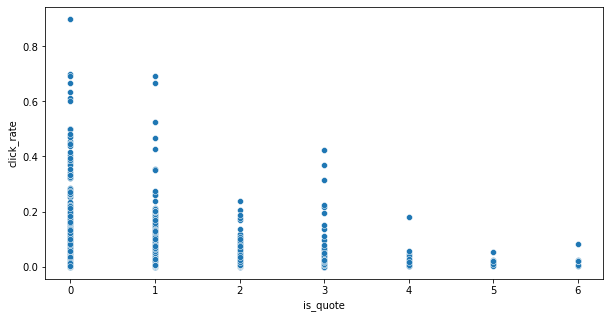

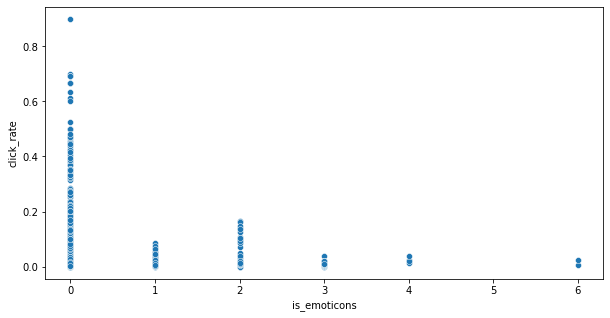

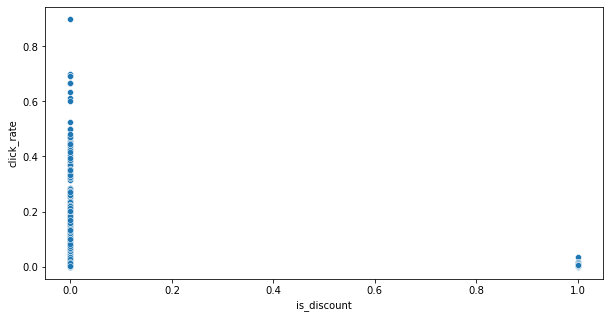

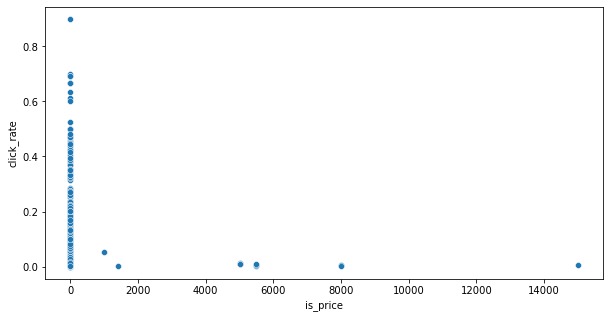

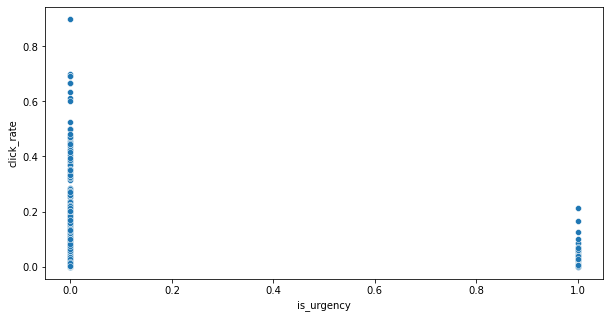

In [19]:
for i,j in enumerate(categorical):
    plt.figure(figsize=(10,5))
    sns.scatterplot(j,'click_rate',data=train,hue_norm='times_of_day')
    plt.show()

### Categorical categorical 

<Figure size 720x432 with 0 Axes>

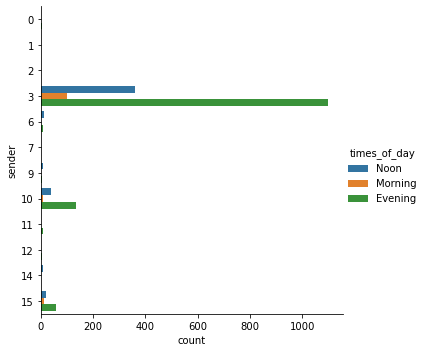

<Figure size 720x432 with 0 Axes>

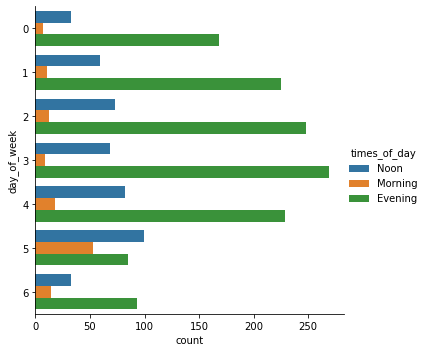

<Figure size 720x432 with 0 Axes>

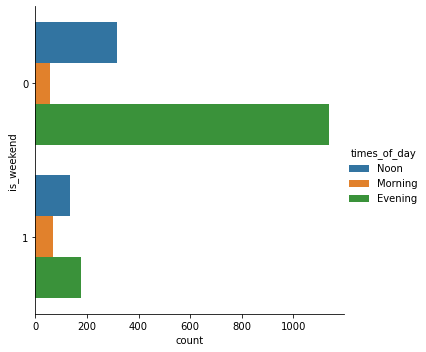

<Figure size 720x432 with 0 Axes>

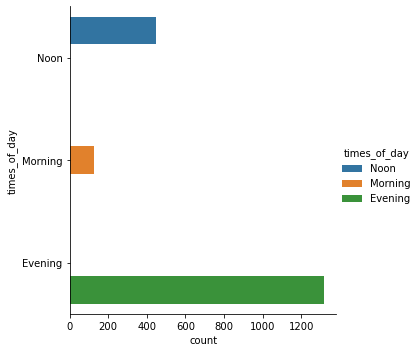

<Figure size 720x432 with 0 Axes>

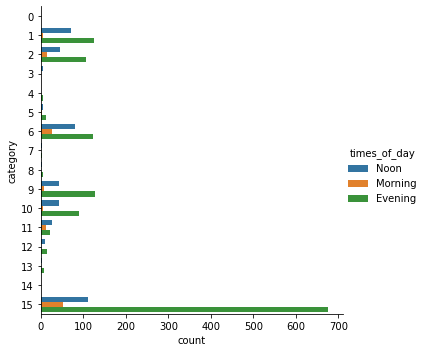

<Figure size 720x432 with 0 Axes>

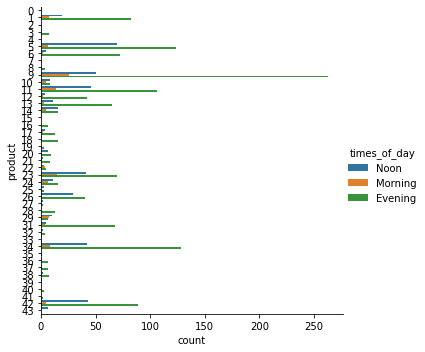

<Figure size 720x432 with 0 Axes>

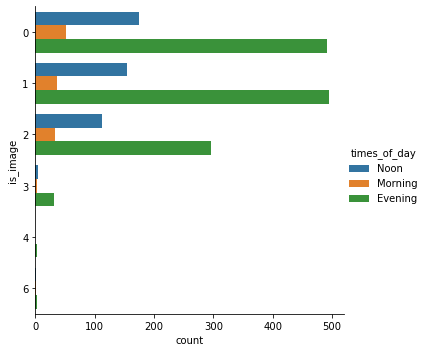

<Figure size 720x432 with 0 Axes>

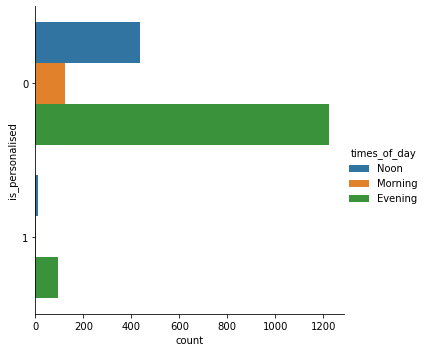

<Figure size 720x432 with 0 Axes>

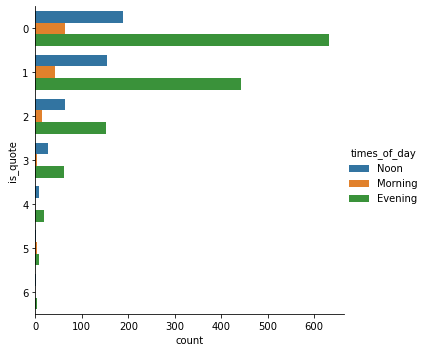

<Figure size 720x432 with 0 Axes>

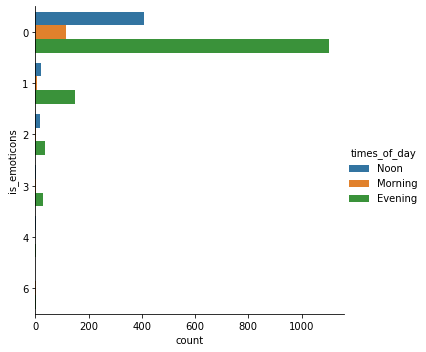

<Figure size 720x432 with 0 Axes>

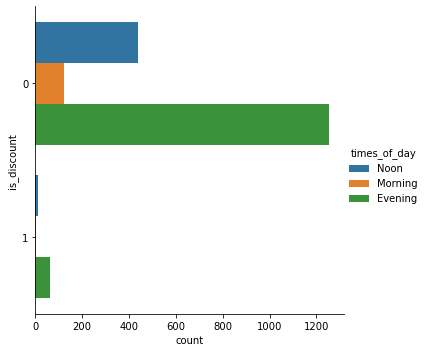

<Figure size 720x432 with 0 Axes>

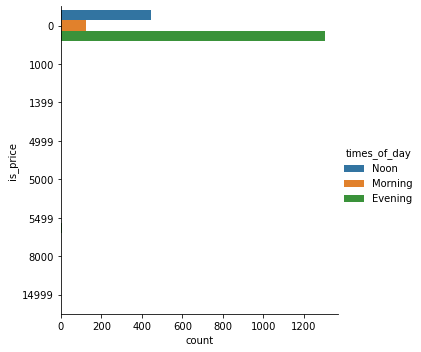

<Figure size 720x432 with 0 Axes>

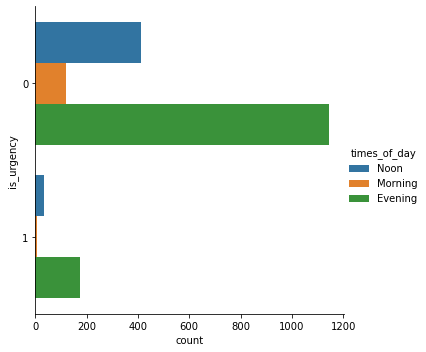

In [20]:
for i in categorical:
    plt.figure(figsize=(10,6))
    sns.catplot(y=i, hue="times_of_day", kind="count", data=train)
    plt.show()

### Other Plots
    To Get Insites on

* How do you design the email content effectively?
* What should your subject line look like?
* What should be the length of the email?
* Do you need images in your email template?

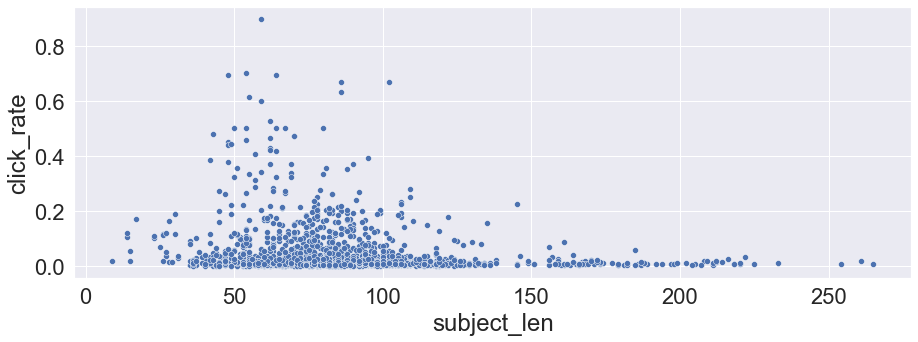

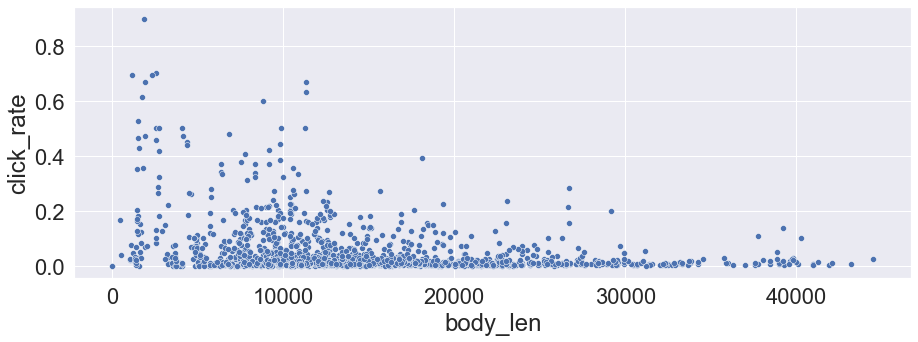

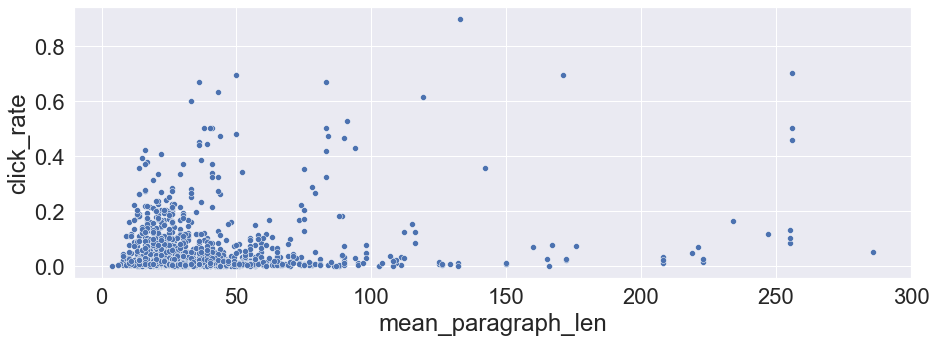

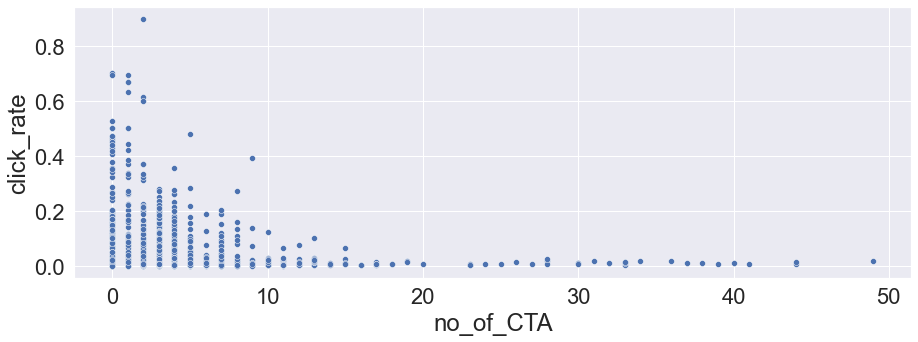

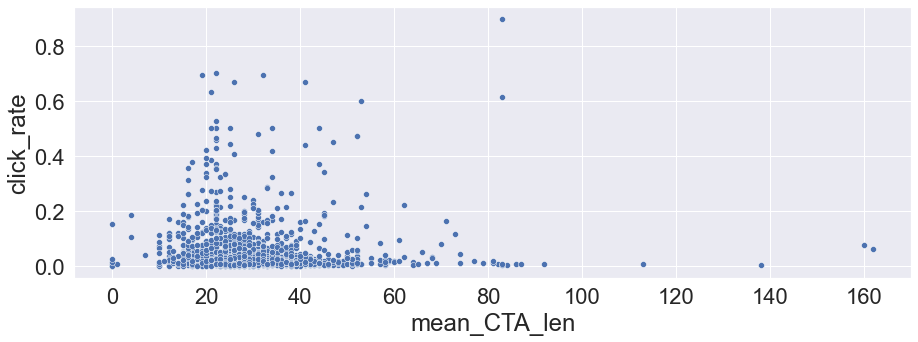

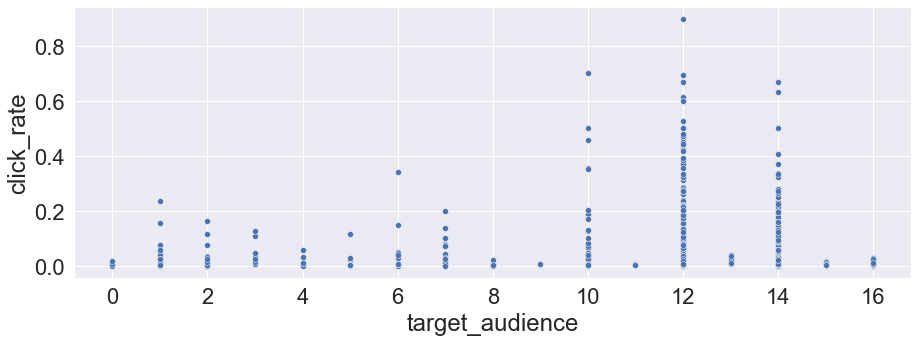

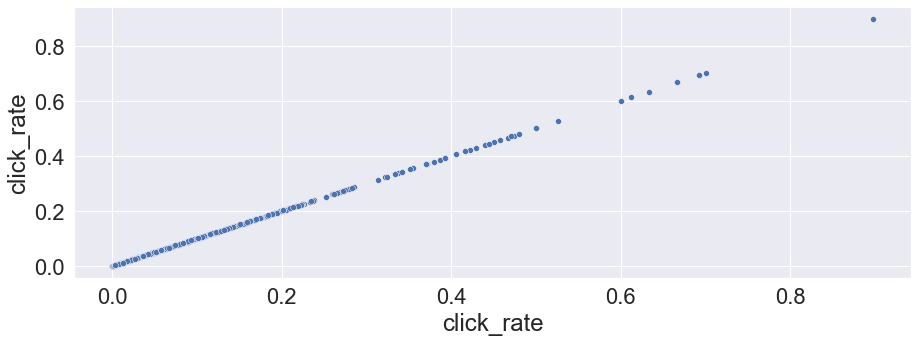

In [21]:
for i in numerical:
    sns.set(font_scale = 2)
    plt.figure(figsize=(15,5))
    sns.scatterplot(x=i, y="click_rate", data=train)
    plt.show()

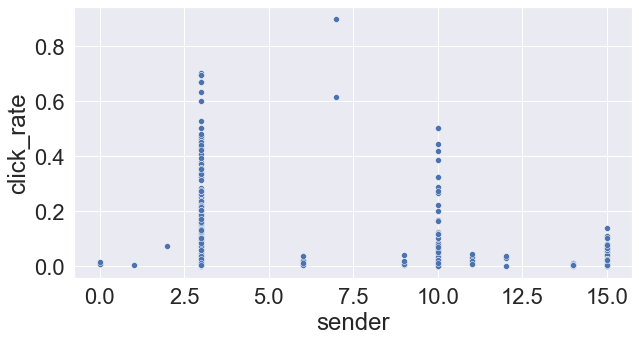

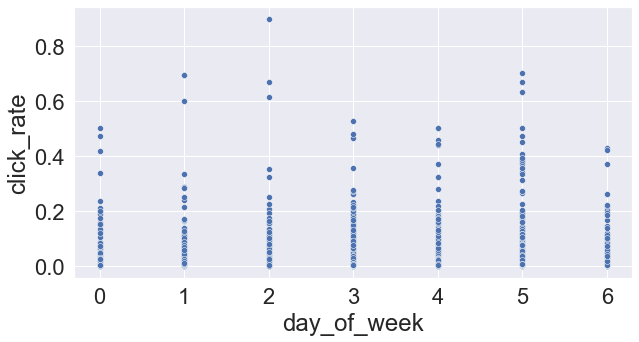

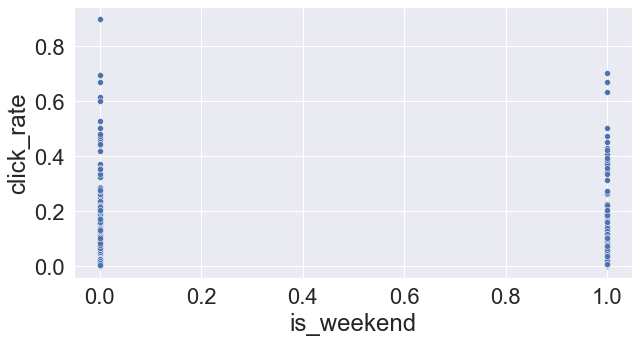

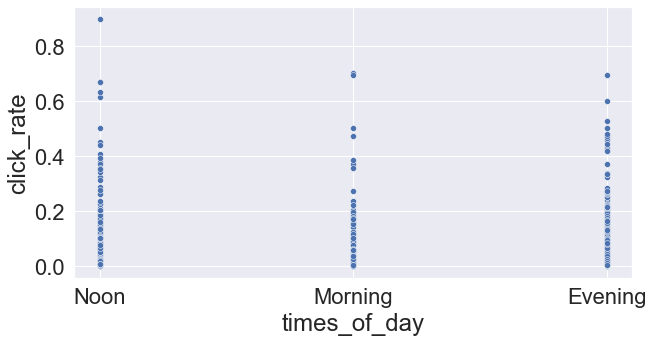

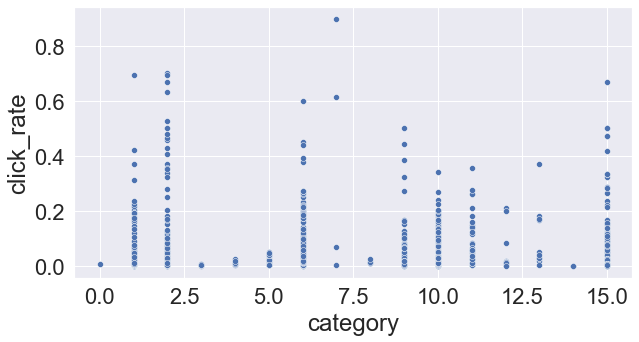

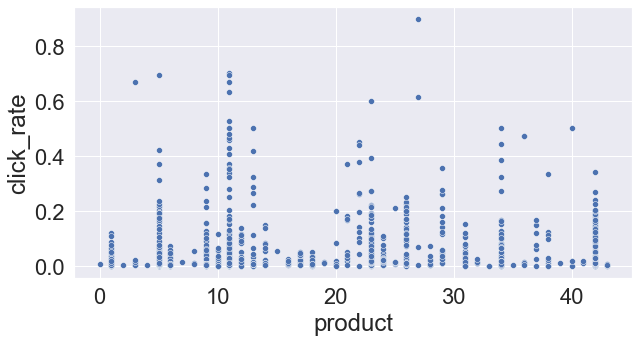

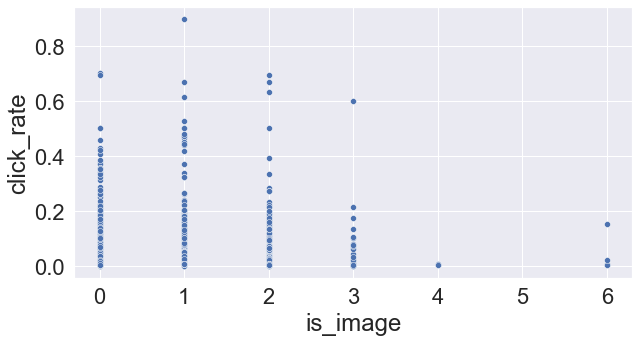

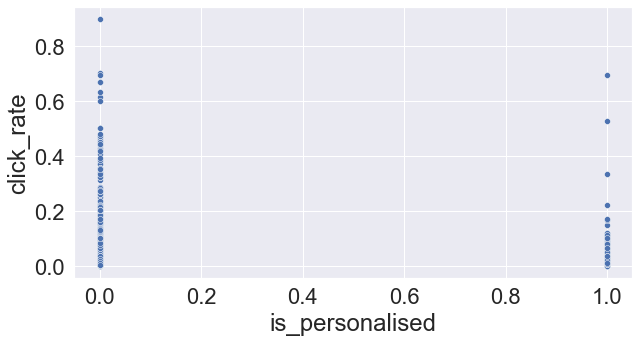

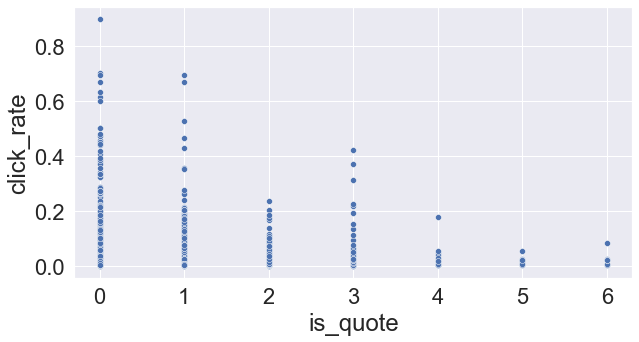

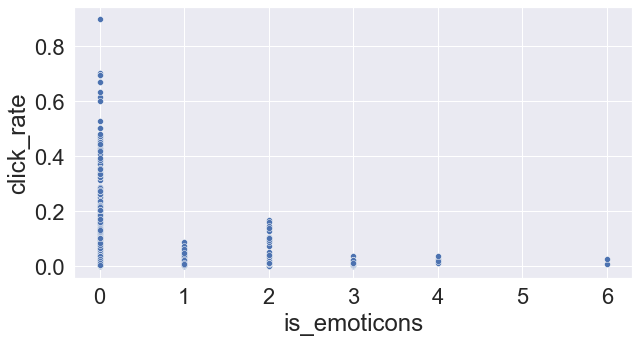

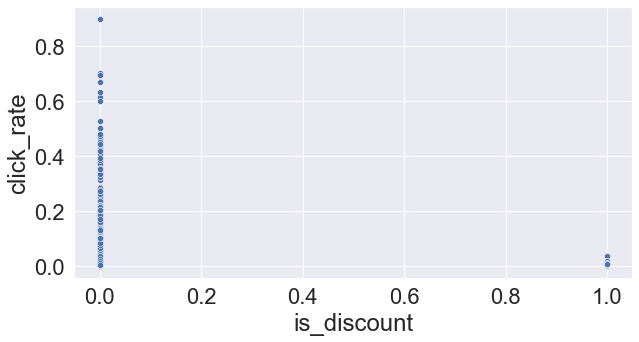

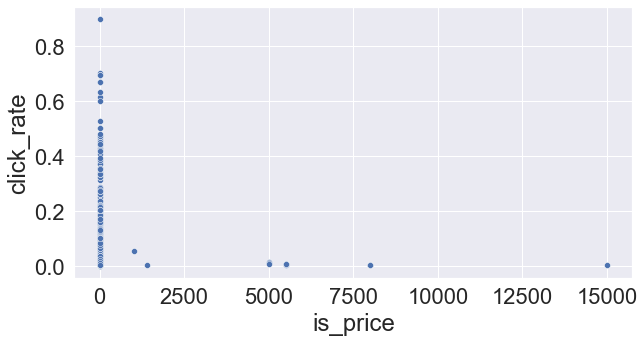

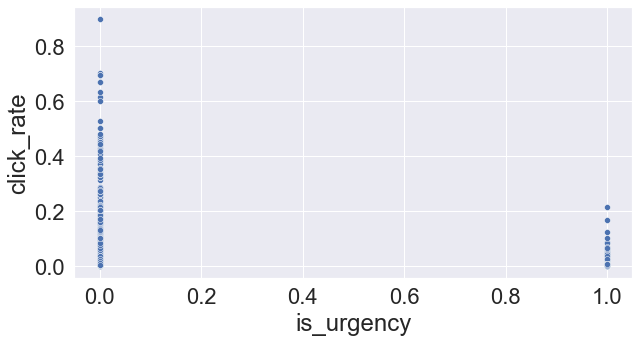

In [22]:
for i,j in enumerate(categorical):
    plt.figure(figsize=(10,5))
    sns.scatterplot(j,'click_rate',data=train,hue_norm='times_of_day')
    plt.show()

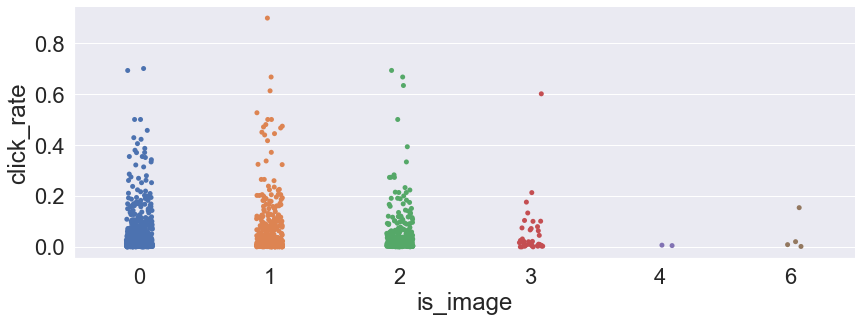

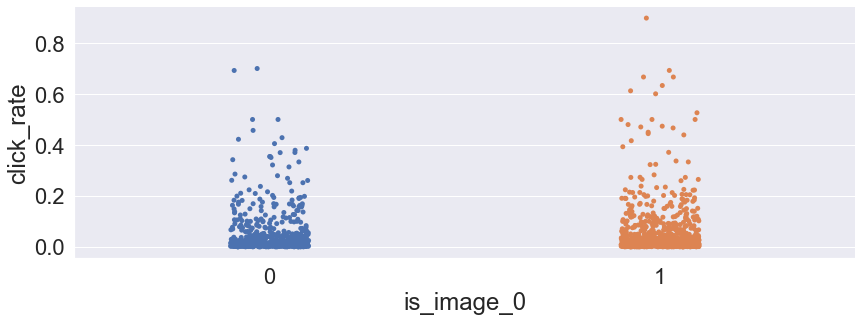

In [23]:
# sepetating the Image to yes or no
train['is_image_0']=train['is_image'].apply(lambda x:0 if x==0 else 1)
#distribution of Click rate with IS_IMAGE
sns.catplot(x="is_image", y="click_rate", data=train,aspect=2.5)
plt.show()
sns.catplot(x="is_image_0", y="click_rate", data=train,aspect=2.5)

In [24]:
train.drop(['is_image_0','is_weekend'],axis=1,inplace=True)

* Effective Email 
        mail Related to Category-7 has High Click Rate
        mail Consisting 3 image are having higher click Rate
        Subject Length Should between 50 to 100
        Body Lenth should be 100-250 and 700-1200
        mean Length of the Paragraph should be 10-40
* What should your subject line look like?
        Subject line Should shorter than 100 letter and greater than 50 letters
* What should be the length of the email?
        the length of the Mail should be 1250 letters including the Subject 
* Do you need images in your email template?
        The Click Rate is High with Images

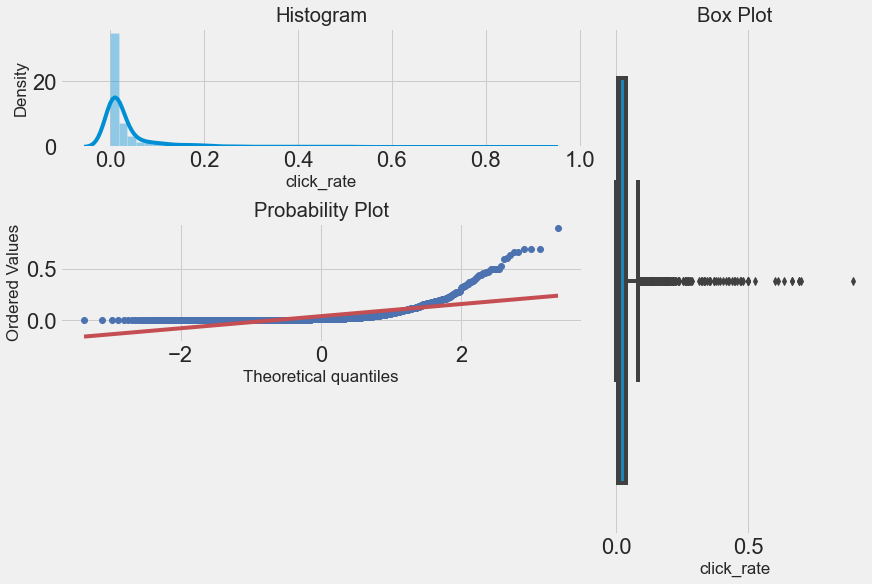

In [25]:
def plotting_3_chart(dataf, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(dataf.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(dataf.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:,2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(dataf.loc[:,feature], orient='v', ax = ax3 );
plotting_3_chart(train, 'click_rate')    

In [26]:
train=pd.get_dummies(train,drop_first=True)

<AxesSubplot:>

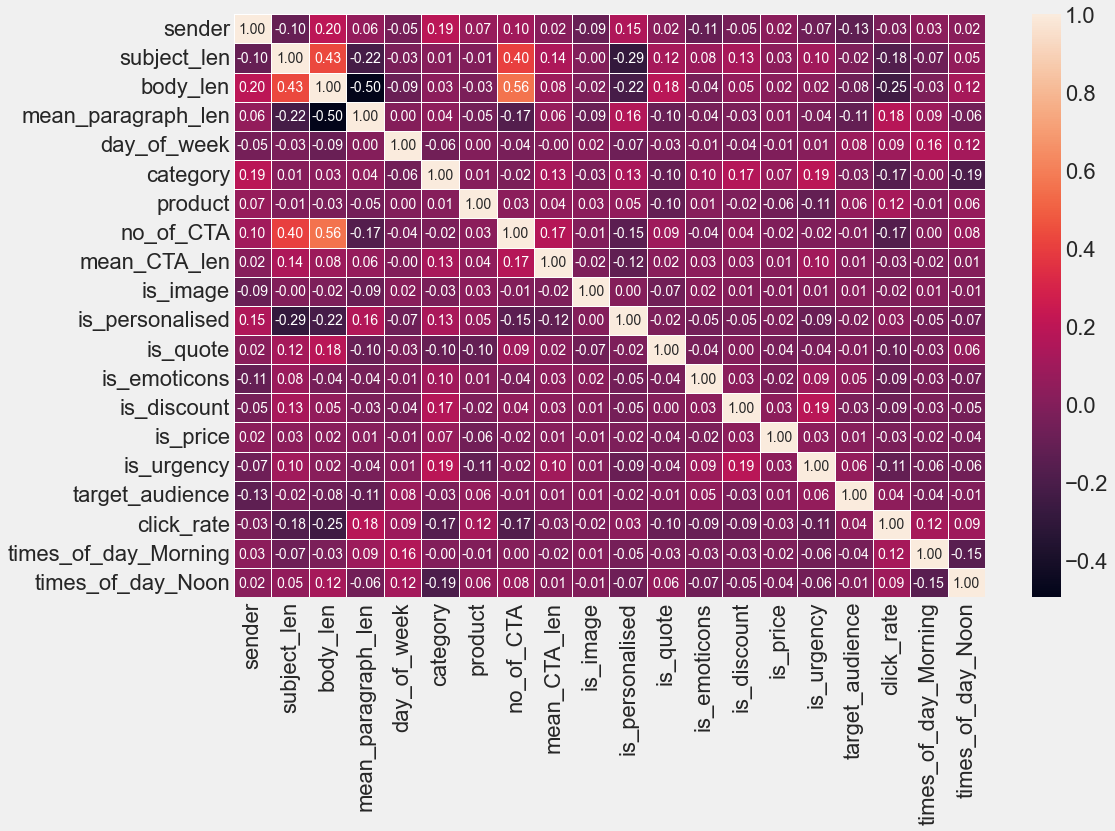

In [27]:
# heat map after One hot encoding
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),linewidths=1,annot=True,fmt='0.2f')

In [28]:
#check 1
#train['no_of_paragraph']=train.body_len/train.mean_paragraph_len
#train['no_of_paragraph'].nunique()
#train.drop('no_of_paragraph',axis=1,inplace=True)

In [29]:
# check 2 converting is columns to Yes or no
train['is_image']=train['is_image'].apply(lambda x:0 if x==0 else 1)
train['is_quote']=train['is_quote'].apply(lambda x:0 if x==0 else 1)
train['is_emoticons']=train['is_emoticons'].apply(lambda x:0 if x==0 else 1)
train['is_price']=train['is_price'].apply(lambda x:0 if x==0 else 1)

In [30]:
# check 3 adding column total lenth of mail
#train['total_length']=train['subject_len']+train['body_len']
#train.drop('total_length',axis=1,inplace=True)

In [31]:
# check 4 cum of boolen column
#train['cum_inf']=train[['is_image','is_personalised','is_quote','is_emoticons','is_discount','is_price','is_urgency']].sum(axis=1)
#train.drop('cum_inf',axis=1,inplace=True)

In [32]:
#model selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error as msle,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor

In [33]:
x=train.drop('click_rate',axis=1)
y=train.click_rate

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=23)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1416, 19), (472, 19), (1416,), (472,))

In [35]:
from xgboost import XGBRegressor 

In [36]:
xg=XGBRegressor(random_state=23)

In [37]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=23,
             reg_alpha=0, reg_lambda=1, ...)

In [38]:
pred4_train=xg.predict(x_train)

In [39]:
pred4_test=xg.predict(x_test)

In [40]:
r2_score(y_train,pred4_train)

0.9954509519367367

In [41]:
r2_score(y_test,pred4_test)

0.6668473523939311

# AdaBoostRegressor

In [42]:
abr1=AdaBoostRegressor(base_estimator=xg,random_state=23)

In [43]:
abr1.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_bin=256, max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=6,
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=0,
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=23,
                                              reg_alpha=0, reg_lambda=1, ...),
                  random_state=23)

In [44]:
pred5_train=abr1.predict(x_train)

In [45]:
r2_score(y_train,pred5_train)

0.996835367891258

In [46]:
pred5_test=abr1.predict(x_test)

In [47]:
r2_score(y_test,pred5_test)

0.6853590909666137

In [48]:
Key_influnce = pd.DataFrame(data=[abr1.feature_importances_*100],columns=abr1.feature_names_in_)
Key_influnce
Key_influnce.max().sort_values(ascending=False)

no_of_CTA               12.761931
times_of_day_Morning    11.174465
body_len                10.813546
is_quote                 8.854909
category                 8.469125
mean_CTA_len             8.389456
mean_paragraph_len       6.493903
is_personalised          5.325933
subject_len              4.535962
product                  4.456238
day_of_week              4.061659
target_audience          4.009306
is_image                 3.202406
times_of_day_Noon        2.992794
is_emoticons             1.724718
sender                   1.298544
is_urgency               1.042717
is_discount              0.320941
is_price                 0.071451
dtype: float32

In [49]:
Key_influnce = pd.DataFrame(data=[xg.feature_importances_*100],columns=xg.feature_names_in_)
Key_influnce
Key_influnce.max().sort_values(ascending=False)

no_of_CTA               16.171032
category                10.813620
is_quote                 9.808722
body_len                 9.144996
mean_paragraph_len       8.233747
mean_CTA_len             7.425576
times_of_day_Morning     6.753007
product                  5.695554
target_audience          5.539263
subject_len              4.295068
day_of_week              2.874869
is_emoticons             2.619785
is_image                 2.313037
sender                   2.090552
times_of_day_Noon        1.969473
is_personalised          1.845551
is_urgency               1.142655
is_discount              0.709305
is_price                 0.554189
dtype: float32

In [50]:
test=pd.read_csv('test_Bk2wfZ3.csv',index_col='campaign_id')

In [51]:
test.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience'],
      dtype='object')

In [52]:
len(train.columns)

20

In [53]:
test.drop(['is_timer','is_weekend'],axis=1,inplace=True)

In [54]:
test=pd.get_dummies(test,drop_first=True)

In [55]:
test['is_image']=test['is_image'].apply(lambda x:0 if x==0 else 1)
test['is_quote']=test['is_quote'].apply(lambda x:0 if x==0 else 1)
test['is_emoticons']=test['is_emoticons'].apply(lambda x:0 if x==0 else 1)
test['is_price']=test['is_price'].apply(lambda x:0 if x==0 else 1)

In [56]:
len(test.columns)

19

In [57]:
click_rate=abr1.predict(test)

In [58]:
test['click_rate']=click_rate

In [59]:
test=test.reset_index()
test

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,times_of_day_Morning,times_of_day_Noon,click_rate
0,1889,3,61,12871,11,6,6,26,3,37,...,0,0,1,0,0,0,14,0,1,0.025769
1,1890,3,54,2569,256,5,2,11,0,22,...,0,0,0,0,0,0,10,1,0,0.699183
2,1891,3,88,1473,78,4,2,11,0,22,...,0,1,0,0,0,0,10,0,0,0.176078
3,1892,3,88,1473,78,3,2,11,0,22,...,0,1,0,0,0,0,10,0,0,0.200109
4,1893,3,78,9020,29,3,6,26,2,40,...,0,0,0,0,0,0,14,0,1,0.159018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,15,9,4,28,...,0,0,0,0,0,0,7,0,0,0.004776
758,2647,3,58,10537,40,3,2,11,5,27,...,0,0,0,0,0,0,16,0,0,0.015293
759,2648,3,100,9132,19,2,15,9,2,23,...,0,0,0,0,0,0,15,0,0,0.008746
760,2649,3,88,1451,75,1,2,11,0,22,...,0,1,0,0,0,0,10,0,1,0.241481


In [60]:
test[['campaign_id','click_rate']].to_csv('Solution_test7.csv')